<font style = "font-size: 35px; color: fff; font-family:Calibri"><b><i>Import thư viện và cài đặt hàm cần thiết</font>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [4]:
def truncate(image): #Giới hạn điểm ảnh chỉ nằm trong [0, 255]
    image = np.where(image < 0, 0, image)
    image = np.where(image > 255, 255, image)
    return image

<font style = "font-size: 35px; color: fff; font-family:Calibri"><b><i>Thay đổi độ sáng cho ảnh</font>

In [5]:
def brightness(image, level):
    image += level
    return truncate(image)

<font style = "font-size: 35px; color: fff; font-family:Calibri"><b><i>Thay đổi độ tương phản cho ảnh</font>

In [6]:
def contrast(image, level):
    F_value = round((259 * (255 + level)) / (255 * (259 - level)), 5)
    image = 128 + F_value * (image - 128)
    return truncate(image)

<font style = "font-size: 35px; color: fff; font-family:Calibri"><b><i>Lật ảnh ngang dọc</font>

In [7]:
def flip_vertical(image):
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def flip_horizontal(image):
    return image.transpose(Image.FLIP_TOP_BOTTOM)

<font style = "font-size: 35px; color: fff; font-family:Calibri"><b><i>Chuyển đổi ảnh RGB thành ảnh xám</font>

In [8]:
def gray_scale(image):
    r = np.array(image[:, :, 0])
    g = np.array(image[:, :, 1])
    b = np.array(image[:, :, 2])
    return 0.2989 * r + 0.5870 * g + 0.1140 * b

<font style = "font-size: 35px; color: fff; font-family:Calibri"><b><i>Chồng 2 ảnh cùng kích thước</font>

In [1]:
def add_gray_picture(image1, image2):
    return np.add((image1 * 0.5).astype(np.uint8), (image2 * 0.5).astype(np.unit8))

<font style = "font-size: 35px; color: fff; font-family:Calibri"><b><i>Làm mờ ảnh</font>

In [9]:
def box_blur(image):
    image_2 = np.copy(image)
    height, width, channel = image.shape[0], image.shape[1], image.shape[2]

    r, g, b = 0, 0, 0
    
    for x in range(1, height - 1):
        for y in range(1, width - 1):
            for i in range(3):
                for j in range(3):
                    r += image[x - 1 + i, y - 1 + j, 0]
                    g += image[x - 1 + i, y - 1 + j, 1]
                    b += image[x - 1 + i, y - 1 + j, 2]

            new_r_value, new_g_value, new_b_value = r / 9, g / 9, b / 9
            
            new_pixel_r, new_pixel_g, new_pixel_b = truncate(new_r_value), truncate(new_g_value), truncate(new_b_value)
            
            image_2[x, y, 0] = new_r_value
            image_2[x, y, 1] = new_g_value
            image_2[x, y, 2] = new_b_value

            r, g, b = 0, 0, 0

    return image_2

<font style = "font-size: 35px; color: fff; font-family:Calibri"><b><i>Hàm main</font>

In [25]:
def Choice1(filename):
    file = Image.open(filename).convert('RGB')
    file_type = input("Kieu du lieu can xuat (png/jpg): ")
    dot = filename.find(".")
    name = filename[0:dot]
    width, height = file.size
    pix = list(file.getdata())
    image = np.array([pix[n:n + width] for n in range(0, width * height, width)])
    level = int(input('Moi nhap vao do sang can thay doi(VD input = 50 la tang con -50 la giam)'))
    bri = brightness(image, level)  
    print('\nKet Qua')
    plt.imshow(bri)
    plt.imsave(name + '_bright.' + file_type, bri.astype(np.uint8))
    

In [28]:
def Choice2(filename):
    file = Image.open(filename).convert('RGB')
    file_type = input("Kieu du lieu can xuat (png/jpg): ")
    dot = filename.find(".")
    name = filename[0:dot]
    width, height = file.size
    pix = list(file.getdata())
    image = np.array([pix[n:n+width] for n in range(0, width*height, width)])
    level = int(input('Moi nhap vao do tuong phan can thay doi(VD input = 50 la tang con -50 la giam va chi nen nhap tu 5->255 de giu ve dep cua buc anh :( ))'))
    con = contrast(image, level)  
    print('\nKet Qua')
    plt.imshow(con)
    plt.imsave(name + '_contrast.' + file_type, con.astype(np.uint8))

In [27]:
def Choice3(filename):
    image = Image.open(filename).convert('RGB')
    file_type = input("Kieu du lieu can xuat (png/jpg): ")
    dot = filename.find(".")
    name = filename[0:dot]
    choice = int(input('Ban muon xoay anh theo kieu nao\n1. Xoay doc\n2. Xoay ngang'))
    if (choice == 1):
        ver = flip_vertical(image)
        print('\nKet Qua')
        plt.imshow(ver)
        plt.imsave(name + '_flip_vertical.' + file_type, np.array(ver))
    elif (choice == 2):
        hor = flip_horizontal(image)
        print('\nKet Qua')
        plt.imshow(hor)
        plt.imsave(name + '_flip_horizontal.' + file_type, np.array(hor))
    else:
        print('Nhap cai di day choi :(')

In [15]:
def Choice4(filename):
    file = Image.open(filename).convert('RGB')
    file_type = input("Kieu du lieu can xuat (png/jpg): ")
    dot = filename.find(".")
    name = filename[0:dot]
    width, height = file.size
    pix = list(file.getdata())
    image = np.array([pix[n:n+width] for n in range(0, width * height, width)])
    gray = gray_scale(image)  
    print('\nKet Qua')
    plt.imshow(gray, cmap = 'gray')
    plt.imsave(name + '_gray.png', gray.astype(np.uint8), cmap = 'gray')

In [16]:
def Choice5(filename1, filename2):
    image1 = Image.open(filename1).convert('RGB')
    file_type = input("Kieu du lieu can xuat (png/jpg): ")
    dot1 = filename.find(".")
    name1 = filename[0:dot1]
    image2 = Image.open(filename2).convert('RGB')
    dot2 = filename.find(".")
    name2 = filename[0:dot2]
    image = add_gray_picture(image1, image2)
    image = gray_scale(image)
    print('\nKet Qua')
    plt.imshow(image, cmap = 'gray')
    plt.imsave(name1 + '_' + name2 + '_add_gray.png', image.astype(np.uint8), cmap = 'gray')

In [17]:
def Choice6(filename):
    file = Image.open(filename).convert('RGB')
    file_type = input("Kieu du lieu can xuat (png/jpg): ")
    dot = filename.find(".")
    name = filename[0:dot]
    width, height = file.size
    pix = list(file.getdata())
    image = np.array([pix[n:n+width] for n in range(0, width * height, width)])
    blur = box_blur(image)
    print('\nKet Qua')
    plt.imshow(blur)
    plt.imsave(name + '_blur.png', blur.astype(np.uint8))

Chao mung ban den voi chuong trinh xu ly anh
-------------------------------
Chuong trinh co nhung tinh nang sau
0. Thuc hien tat ca
1. Thay doi do sang
2. Thay doi tuong phan
3. Xoay anh doc, ngang
4. Thay doi anh tu RGB thanh anh xam
5. Gop 2 anh xam co cung kich thuoc
6. Lam moi anh

Ket Qua


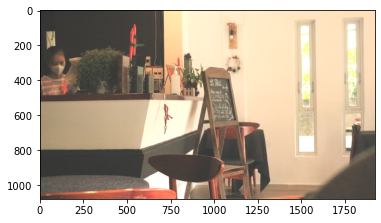

In [26]:
print('Chao mung ban den voi chuong trinh xu ly anh\n-------------------------------\nChuong trinh co nhung tinh nang sau\n0. Thuc hien tat ca\n1. Thay doi do sang\n2. Thay doi tuong phan\n3. Xoay anh doc, ngang\n4. Thay doi anh tu RGB thanh anh xam\n5. Gop 2 anh xam co cung kich thuoc\n6. Lam moi anh')
choice = int(input('Moi ban nhap chon tinh nang: '))
if (choice == 0):
    filename = str(input('Moi nhap file muon xu ly: '))
    filename_sec = str(input('Moi nhap file thu hai cho yeu cau gop anh: '))
    Choice1(filename)
    Choice2(filename)
    Choice3(filename)
    Choice4(filename)
    Choice5(filename, filename_sec)
    Choice6(filename)
if (choice == 1):
    filename = str(input('Moi nhap file muon xu ly: '))
    Choice1(filename)
if (choice == 2):
    filename = str(input('Moi nhap file muon xu ly: '))
    Choice2(filename)
if (choice == 3):
    filename = str(input('Moi nhap file muon xu ly: '))
    Choice3(filename)
if (choice == 4):
    filename = str(input('Moi nhap file muon xu ly: '))
    Choice4(filename)
if (choice == 5):
    filename1 = str(input('Moi nhap file dau tien muon xu ly: '))
    filename2 = str(input('Moi nhap file thu hai muon xu ly: '))
    Choice5(filename1, filename2)
if (choice == 6):
    filename = str(input('Moi nhap file muon xu ly: '))
    Choice6(filename)